<a href="https://colab.research.google.com/github/kashifalikhan36/Machine_learning_Resources/blob/main/RandomForest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
alexa=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [3]:
alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [54]:
positive=alexa[alexa['feedback']==1]
negative=alexa[alexa['feedback']==0]

<ipython-input-55-59fcd35df55e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=alexa, x='feedback', order=alexa['feedback'].value_counts().index, palette="Blues")


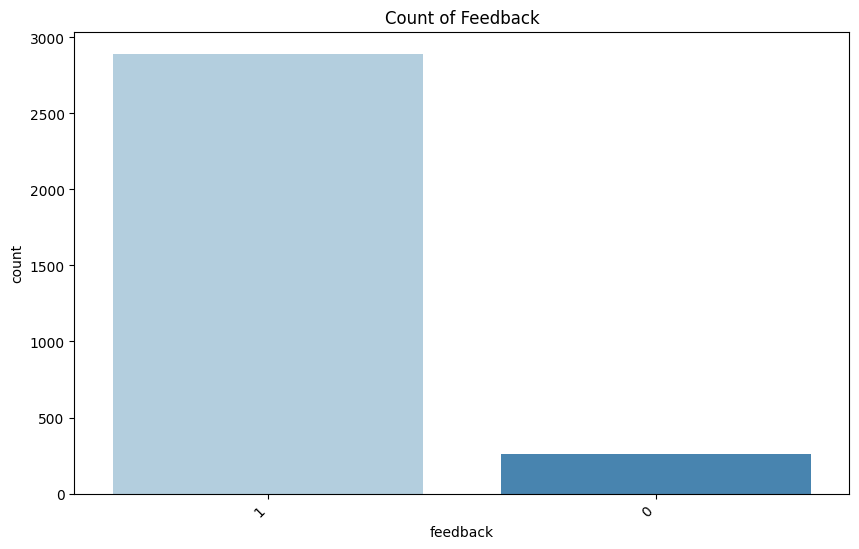

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=alexa, x='feedback', order=alexa['feedback'].value_counts().index, palette="Blues")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.title("Count of Feedback")
plt.show()

In [56]:
alexa.drop(["rating","date"],axis=1,inplace=True)

In [57]:
variation_dummies=pd.get_dummies(alexa['variation'],drop_first=True).astype(int)

In [58]:
alexa.drop('variation',axis=1,inplace=True)

In [59]:
alexa=pd.concat([alexa,variation_dummies],axis=1)

In [60]:
alexa.dropna(inplace=True)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
alexa_countvectorizor=vectorizer.fit_transform(alexa['verified_reviews'])

In [62]:
alexa_countvectorizor.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
alexa.drop('verified_reviews',axis=1,inplace=True)

In [64]:
encoded_reviews=pd.DataFrame(alexa_countvectorizor.toarray(),columns=vectorizer.get_feature_names_out())

In [65]:
alexa=pd.concat([alexa,encoded_reviews],axis=1)

In [66]:
alexa.dropna(inplace=True)

In [67]:
x=alexa.drop('feedback',axis=1)
y=alexa['feedback']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100,criterion="entropy" , random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)